## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

## Homework 1
## Alexander Fabiano
## Applied Machine Learning

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("seaborn")
import json

### CSV
**1. Read in CSV files**

The following data set is from the National Health and Nutrition Examination Survey, a subset of the CDC database.

In [18]:
nhanes = pd.read_csv("nhanes.csv")
nhanes.head()
##list(nhanes) ##lists only column names from dataframe

,seqn,gender,age,race,citizen,education,married,hsize,hincome,weight,height,bmi,waist,grip
0,73557,M,69,B,True,High School,4.0,3,4.0,78.3,171.3,26.7,100.0,55.2
1,73558,M,54,W,True,High School,1.0,4,7.0,89.5,176.8,28.6,107.6,61.5
2,73559,M,72,W,True,Some College,1.0,2,10.0,88.9,175.3,28.9,109.2,91.0
3,73560,M,9,W,True,NaN,NaN,4,9.0,32.2,137.3,17.1,61.0,32.2
4,73561,F,73,W,True,College,1.0,2,15.0,52.0,162.4,19.7,NaN,30.9


In [19]:
nhanes.married.unique()
## This data set was acquired second and no documentation on the 'married variable could be acquired, 
## so it will not be used in any analysis

array([  4.,   1.,  nan,   3.,   2.,   5.,   6.,  77.,  99.])

In [20]:
nhanes.drop(['married'], axis=1, inplace=True) ##axis=1 specifies a column

In [21]:
nhanes.describe()

,seqn,age,hsize,hincome,weight,height,bmi,waist,grip
count,10175.000000,10175.000000,10175.000000,10042.000000,9723.000000,9067.000000,9055.000000,8661.000000,7677.000000
mean,78644.000000,31.484128,3.874693,10.884983,62.599054,155.883759,25.678244,87.272047,63.054891
std,2937.413829,24.421651,1.722184,13.878864,32.331616,23.176270,7.955137,22.542605,25.098439
min,73557.000000,0.000000,1.000000,1.000000,3.100000,79.700000,12.100000,40.200000,8.000000
25%,76100.500000,10.000000,2.000000,5.000000,37.950000,149.500000,19.700000,71.200000,45.600000
50%,78644.000000,26.000000,4.000000,8.000000,65.300000,162.000000,24.700000,87.800000,60.300000
75%,81187.500000,52.000000,5.000000,14.000000,83.500000,171.050000,30.200000,102.800000,80.700000
max,83731.000000,80.000000,7.000000,99.000000,222.600000,202.600000,82.900000,177.900000,162.800000


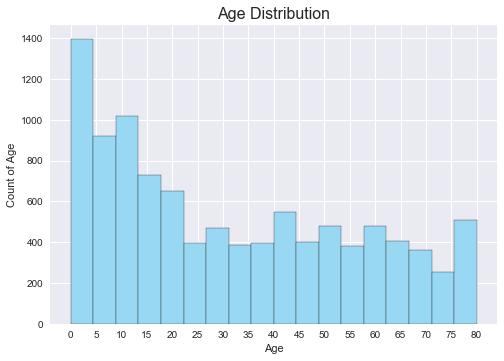

In [71]:
nhanes['age'].hist(bins = 18, color ="#99D8F2", edgecolor = "black")
plt.xticks(np.arange(0,85,5))
plt.title("Age Distribution", fontsize=16)
plt.ylabel("Count of Age")
plt.xlabel("Age")
plt.show()
## the following code resulted from a failed attempt to make a histogram divided into bins, but actually works to
## segment the column data into bins.
## x = pd.cut(nhanes['age'], bins = np.linspace(0,85,18), retbins = True)

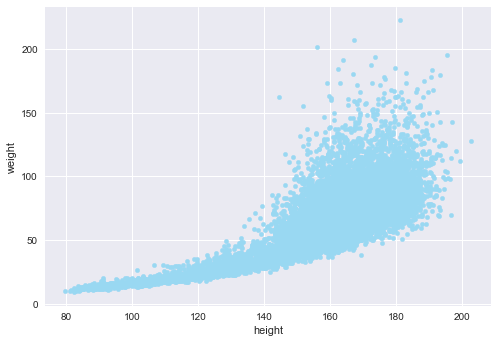

In [73]:
##%matplotlib inline ## this command eliminates the need to do plt.show() after each plot
nhanes.plot.scatter(y='weight',x='height', color = '#99D8F2') ###light blue: 4F91F6
plt.show()

In [26]:
nhanes.age.groupby('age').count()

KeyError: 'age'

Text(0.5,1,'Race')

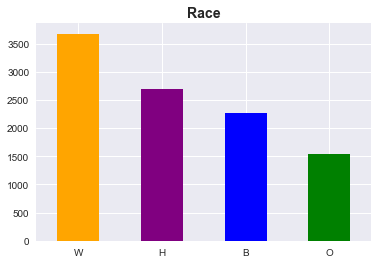

In [36]:
nhanes['race'].value_counts().plot(kind='bar', color=[['orange', 'purple', 'blue', 'green']], rot=0)
plt.title("Race", fontweight='bold', fontsize=14)
##plt.show()

In [6]:
nhanes['race'].value_counts()

W    3674
H    2690
B    2267
O    1544
Name: race, dtype: int64

In [7]:
nhanes['gender'].value_counts()

F    5172
M    5003
Name: gender, dtype: int64

In [8]:
work_fatal = pd.read_csv("2012_Workplace_Fatalities_by_State.csv")

In [9]:
work_fatal.head()

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
0,"South Carolina\r(33.99882060100049, -81.045367...",63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State
1,"West Virginia\r(38.665511497000466, -80.712639...",49.0,6.9,46.0,19800.0,4.1,1798.0,27.0,7.0,173.0,Federal
2,"Massachusetts\r(42.27687306500047, -72.0826898...",44.0,1.4,1.0,69700.0,3.1,1929.0,21.0,33.0,123.0,Federal
3,"Tennessee\r(35.680943063000484, -85.7744864219...",101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State
4,"Oklahoma\r(35.472034350000456, -97.52106845499...",97.0,6.1,42.0,39000.0,3.6,1872.0,24.0,19.0,131.0,Federal


In [10]:
work_fatal['State'] = work_fatal['State'].map(lambda x: str(x).split('\r')[0])

In [11]:
work_fatal.head()

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
0,South Carolina,63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State
1,West Virginia,49.0,6.9,46.0,19800.0,4.1,1798.0,27.0,7.0,173.0,Federal
2,Massachusetts,44.0,1.4,1.0,69700.0,3.1,1929.0,21.0,33.0,123.0,Federal
3,Tennessee,101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State
4,Oklahoma,97.0,6.1,42.0,39000.0,3.6,1872.0,24.0,19.0,131.0,Federal


In [12]:
work_fatal.describe()

,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once
count,51.000000,51.000000,50.000000,42.000000,43.000000,50.000000,50.00000,49.000000,50.000000
mean,181.274510,4.300000,25.100000,64178.571429,3.620930,1727.880000,25.50000,38.979592,123.880000
std,641.619048,2.763548,14.733344,61912.808619,0.709983,963.377702,14.57738,38.594305,73.311647
min,8.000000,1.400000,1.000000,6500.000000,2.300000,363.000000,1.00000,5.000000,31.000000
25%,39.000000,2.600000,12.000000,26875.000000,3.150000,996.500000,13.25000,9.000000,85.000000
50%,70.000000,3.500000,25.000000,47250.000000,3.500000,1812.000000,25.50000,26.000000,111.500000
75%,114.500000,5.050000,37.750000,75625.000000,3.950000,2120.500000,37.75000,53.000000,134.000000
max,4628.000000,17.700000,50.000000,345400.000000,5.600000,6422.000000,50.00000,216.000000,521.000000


In [13]:
cps = pd.read_stata("cps_1999-2014.dta")
cps.head()

,year,serial,cpsid,ownershp,hhincome,proptax,pubhous,rentsub,foodstmp,stampno,...,faminc,pernum,cpsidp,wtsupp,wtfinl,relate,age,sex,race,marst
0,2014,1,2.013120e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$75,000 - 99,999",1,2.013120e+13,NaN,2668.7604,Head/householder,76,Female,White,Divorced
1,2014,2,2.014020e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$75,000 - 99,999",1,2.014020e+13,NaN,2745.7466,Head/householder,65,Male,White,Never married/single
2,2014,3,2.014010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$100,000 - 149,999",1,2.014010e+13,NaN,3344.7320,Head/householder,78,Male,White,"Married, spouse present"
3,2014,3,2.014010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$100,000 - 149,999",2,2.014010e+13,NaN,3087.4410,Spouse,76,Female,White,"Married, spouse present"
4,2014,4,2.012120e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Under $5,000",1,2.012120e+13,NaN,3061.8081,Head/householder,58,Male,Black/Negro,Never married/single


In [14]:
cps['cpsid'].value_counts()
##len(cps.cpsid)

0.000000e+00    206539
2.014020e+13       104
2.015020e+13        94
2.015031e+13        91
2.015011e+13        91
2.014020e+13        88
2.015031e+13        88
2.014011e+13        87
2.015030e+13        80
2.014011e+13        80
2.015020e+13        80
2.015030e+13        80
2.014020e+13        80
2.015020e+13        80
2.015031e+13        78
2.015010e+13        77
2.014021e+13        77
2.014030e+13        77
2.014031e+13        76
2.015030e+13        76
2.014030e+13        76
2.015020e+13        75
2.014020e+13        75
2.014030e+13        72
2.015030e+13        72
2.015020e+13        72
2.014020e+13        72
2.014031e+13        72
2.014020e+13        72
2.015031e+13        72
                 ...  
2.014091e+13         1
2.015100e+13         1
2.014010e+13         1
2.014021e+13         1
2.014061e+13         1
2.016010e+13         1
2.013041e+13         1
2.012110e+13         1
2.015081e+13         1
2.014101e+13         1
2.014051e+13         1
2.012111e+13         1
2.016080e+1

In [15]:
list(cps)

['year',
 'serial',
 'cpsid',
 'ownershp',
 'hhincome',
 'proptax',
 'pubhous',
 'rentsub',
 'foodstmp',
 'stampno',
 'stampmo',
 'stampval',
 'atelunch',
 'lunchsub',
 'frelunch',
 'month',
 'faminc',
 'pernum',
 'cpsidp',
 'wtsupp',
 'wtfinl',
 'relate',
 'age',
 'sex',
 'race',
 'marst']

In [16]:
##cps['hhincome'] = cps['hhincom'].drop()
cps = cps.drop(cps[cps.hhincome < 0].index)

In [17]:
cps['hhincome'].describe()

count    5.838400e+05
mean     8.861104e+04
std      9.562835e+04
min      0.000000e+00
25%      3.486400e+04
50%      6.686000e+04
75%      1.136140e+05
max      2.289913e+06
Name: hhincome, dtype: float64

In [41]:
cars = []
with open("car.data.txt", "r") as f:
    for line in f:
        tokens = line.split(",")
        cars.append(tokens)
cars[:10]

[['vhigh', 'vhigh', '2', '2', 'small', 'low', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'med', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'high', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'med', 'low', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'med', 'med', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'med', 'high', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'big', 'low', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'big', 'med', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'big', 'high', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '4', 'small', 'low', 'unacc\n']]

buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high

In [42]:
headers = ['BuyPrice', 'MaintPrice', 'Doors', 'Persons', 'TrunkSize', 'Safety']
car = pd.read_csv('car.data.txt', header = None, names = headers)
car.head()

,BuyPrice,MaintPrice,Doors,Persons,TrunkSize,Safety
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc


In [ ]:
with open("CDC.json") as x:
    cdc = json.load(x)

In [ ]:
len(cdc)

In [ ]:
cdc.keys()

In [ ]:
cdc['meta']['view'].keys()

In [ ]:
cdc['meta']['view']['columns']

In [ ]:
[(x['fieldName'], x['position']) for x in cdc['meta']['view']['columns']]

In [ ]:
labels = ['yearstart',
 'yearend',
 'locationabbr',
 'locationdesc',
 'datasource',
 'topic',
 'question',
 'response',
 'datavalueunit',
 'datavaluetype',
 'datavalue', 
 'datavaluealt', 
 'datavaluefootnotesymbol', 
 'datavaluefootnote', 
 'lowconfidencelimit', 
 'highconfidencelimit']

In [ ]:
df = pd.DataFrame.from_records([x[8:24] for x in cdc['data']], columns = labels)

In [ ]:
df

In [ ]:
cdc['data']

In [ ]:
pd.read_json('CDC.json')